There were a few datasets whose file sizes were too large to upload to GitHub. These datasets can be accessed here:

https://drive.google.com/drive/u/1/folders/17Rnw5-ZkVCAr97ZOH-gIh95BXnm6AgwB

____________________________________________________________________________________________________________________________

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import integrate
import scipy.integrate as spi
from scipy import ndimage
from scipy.ndimage import gaussian_filter1d 
import time
%matplotlib inline 

---

## Problem 1: Approximate a function with a NN 

Design and train a 2-layer (input, hidden layer, output) neural network to approximate the function:

```python
def fit_func(x):
    y = np.cos( (np.sin(2*np.pi*x) + x**2 - 3.0*x**3) )
    return y 
```

over the $x$ domain [-1,1]. The goal is to achieve a loss of about 1e-3. 




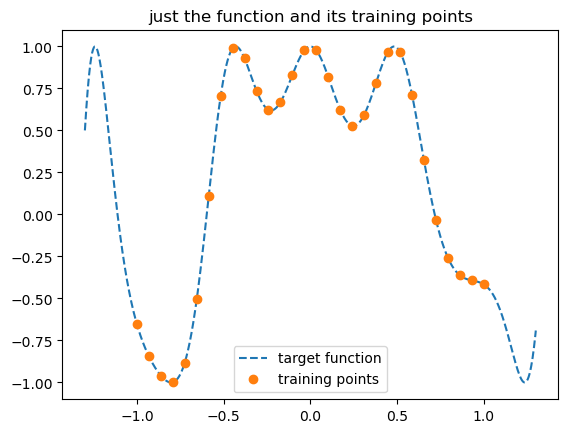

loss after step 1, learning rate= 0.01: 0.021513763465928818
loss after step 2, learning rate= 0.008: 0.0013909504206024532
loss after step 3, learning rate= 0.005: 0.0008766717711541205
loss after step 4, learning rate= 0.001: 0.0008366289724468426


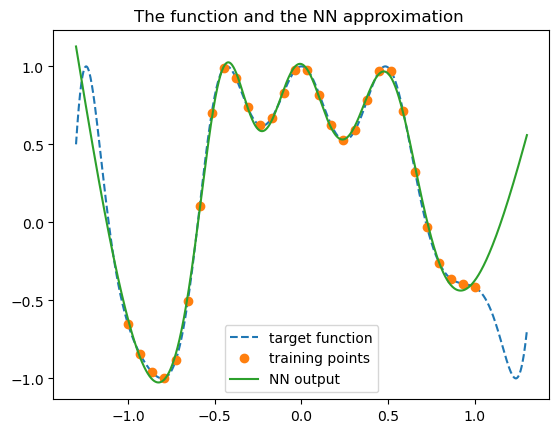

Ultimately, after adding steps and trying many combinations of learning rates, iterations,
      number of points in the hidden layer, etc, I started playing with the actvation functions.
      This seemed to make the most noticable impact. I tried Swish, relu, etc. I even tried cos^2 as
      we did in HW 10. I turned to google to find other common activation functions. One suggested to me was 
      hyperbolic tan, tanh. I tried this, and combined with many steps to slowly reduce learning rate, 
      this eventually got a loss of about 1.3e-3


In [ ]:
# your code here
#i think i will need these later :)

def ReLU(x):
    '''ReLU: equal to x where x > 0, otherwise equal to 0.0'''
    return np.maximum(x, 0.0)

def Heaviside(x):
    '''Heaviside step function: equal to 1.0 where x > 0, otherwise equal to 0.0'''
    return np.where(x>0, 1.0, 0.0)

def Sigmoid(x):
    '''Sigmoid function: 1/(1+exp(-x))'''
    return 1.0/(1+np.exp(-x))

def Swish(x):
    '''Swish function T(x) (see reading, equation 11.14)'''
    return x*Sigmoid(x)

def tanh(x):
    return np.tanh(x)**2

rng = np.random.default_rng()


def weight_init(in_size, out_size):
    weights = (rng.random((in_size, out_size))*2-1) * (1/np.sqrt(in_size))
    return weights
    

def bias_init(in_size, out_size):
    biases = (rng.random((1, out_size))*2-1) * (1/np.sqrt(in_size))
    return biases


# Now define the parameters for this network. 
def init_2_layer(Nin, Nhid, Nout):
    '''Initializes the parameters of a 2-layer network.
    Nin is the number of inputs, Nhid is the number of hidden layers, Nout is the number of outputs'''
    
    NNparams = {'w1' : weight_init(Nin, Nhid),
                'b1' : bias_init(Nin, Nhid),
                'w2' : weight_init(Nhid, Nout),
                'b2' : bias_init(Nhid, Nout)}

    return NNparams

# A useful function to count the parameters in any network

def count_params(params):
    param_count = 0
    for (key, val) in params.items():
        count = len(val.reshape(-1))  # reshape into a single 1D array to count all the elements
        print(f"{key}: {count} parameters")
        param_count += count
        
    print(f"Total: {param_count} parameters")
    return param_count

# Now define the forward pass for this 2-layer network.

def forward(params, x_in):
    '''Forward pass of vector x_in through the network defined by params'''

    z1 = (x_in @ params['w1']) + params['b1']   # multiply weights, add bias
    a1 = tanh(z1)   # #tanh was suggested to me by google when I was looking at best nonlinear activation functions
    z2 = (a1 @ params['w2']) + params['b2']   # multiply weights, add bias

    return z2     
# in this case, no activation at the output layer
# We have the same MSE loss function as last class:

def compute_loss(params, x_in, y_true):
    y_pred = forward(params, x_in)
    L = np.mean((y_pred - y_true)**2)
    return L




def fit_func(x):
    y = np.cos( (np.sin(2*np.pi*x) + x**2 - 3.0*x**3) )
    return y 
# Define the training data (corresponding x and y values) and plot it

# How many points for training?
Ntrain = 30   

x_train = np.linspace(-1,1,Ntrain).reshape(Ntrain,1)   # needs to be 2D, 8 rows (inputs) and 1 column
y_train = fit_func(x_train).reshape(Ntrain,1)          # also should be 2D, 8 rows and 1 column

# Plot the function over a slightly expanded range
x_plot = np.linspace(-1.3,1.3,1000)
y_plot = fit_func(x_plot)

plt.figure()
plt.plot(x_plot, y_plot, '--', label="target function")
plt.plot(x_train, y_train, 'o', label="training points")
plt.legend()
plt.title("just the function and its training points")
plt.show()
plt.close





iters = 75000             # number of steps for gradient descent
interval = 10000          # how often to print the loss


#I am training the NN in steps!

my_params = init_2_layer(1, 150, 1)

#  High learning rate
learning_rate = 0.01
for i in range(1, iters+1):
    gradients = grad(compute_loss)(my_params, x_train, y_train)
     # Update parameters 
    for (key, val) in my_params.items():
        my_params[key] -=  learning_rate * gradients[key]

print(f"loss after step 1, learning rate= {learning_rate}:", compute_loss(my_params, x_train, y_train))

# Reduce learning rate
learning_rate = 0.008
for i in range(1, iters+1):
    gradients = grad(compute_loss)(my_params, x_train, y_train)
     # Update parameters 
    for (key, val) in my_params.items():
        my_params[key] -=  learning_rate * gradients[key]

print(f"loss after step 2, learning rate= {learning_rate}:", compute_loss(my_params, x_train, y_train))

# reduce learning rate again
learning_rate = 0.005
for i in range(1, iters+1):
    gradients = grad(compute_loss)(my_params, x_train, y_train)
     # Update parameters 
    for (key, val) in my_params.items():
        my_params[key] -=  learning_rate * gradients[key]

print(f"loss after step 3, learning rate= {learning_rate}:", compute_loss(my_params, x_train, y_train))

# reduce learning rate again
learning_rate = 0.001
for i in range(1, iters+1):
    gradients = grad(compute_loss)(my_params, x_train, y_train)
     # Update parameters 
    for (key, val) in my_params.items():
        my_params[key] -=  learning_rate * gradients[key]

print(f"loss after step 4, learning rate= {learning_rate}:", compute_loss(my_params, x_train, y_train))


# Plot the function over a slightly expanded range
x_plot = np.linspace(-1.3,1.3,1000).reshape(1000,1)
y_plot = fit_func(x_plot)
y_NN = forward(my_params, x_plot)

plt.plot(x_plot, y_plot, '--', label="target function")
plt.plot(x_train, y_train, 'o', label="training points")
plt.plot(x_plot, y_NN, '-', label="NN output")
plt.title("The function and the NN approximation ")
plt.legend()
plt.show()


print("""Ultimately, after adding steps and trying many combinations of learning rates, iterations,
      number of points in the hidden layer, etc, I started playing with the actvation functions.
      This seemed to make the most noticable impact. I tried Swish, relu, etc. I even tried cos^2 as
      we did in HW 10. I turned to google to find other common activation functions. One suggested to me was 
      hyperbolic tan, tanh. I tried this, and combined with many steps to slowly reduce learning rate, 
      this eventually got a loss of about 1.3e-3""")

## Problem 6: Mobile phone pricing

You're planning to introduce a new line of mobile phones that will compete with existing offerings, and you want to know how to set prices. You've collected market research on existing phones with their features and price ranges (grouped into 4 price categories, 0-3.)

Train a neural net to predict the price category based on phone features. Try to get the best possible performance but be careful about overfitting. In your answer, be sure to show that you've explored several possible network architectures and hyperparameters.

The data in the file `phone_price_data.csv` is adapted from a Kaggle dataset by Abhishek Sharma, https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data.

In [8]:
# your code here
import autograd.numpy as np
from autograd import grad

data = np.loadtxt('phone_price_data.csv', delimiter=',', skiprows=1)

#LOADING X AND Y 
X = data[:, :-1]
Y = data[:, -1].astype(int)   #4 classes: 0,1,2,3

#normalizing x columns

X_norm = X / (np.max(np.abs(X), axis=0, keepdims=True))


#randomly sort the data  (I had chat gpt help find this piece of code)
N = X_norm.shape[0]    

indices = np.random.permutation(N)  

X_shuffled = X_norm[indices]
Y_shuffled = Y[indices]

#splitting the data 80/20 to test later
split = int(0.8 * N)

X_train = X_shuffled[:split]
Y_train = Y_shuffled[:split]

X_test  = X_shuffled[split:]
Y_test  = Y_shuffled[split:]


#I have already included all of the other necessary code functions for setting up a neural net, 
# above in other problems including code for one hidden layer

#one hot encoding from lab

categories = sorted(list(set(Y_train)))  # collect all the UNIQUE labels in the training data, make a list
print("Categories:", categories)

num_categories = len(categories)  # should be 4

Ntrain = len(Y_train)
Y_train_encoded = np.zeros((Ntrain, num_categories))

for i in range(num_categories):
    c = categories[i]   # find the label for the ith category
    Y_train_encoded[Y_train==c,i] = 1   # set the corresponding entries to 1 in the one-hot encoded vector

Ntest = len(Y_test)
Y_test_encoded = np.zeros((Ntest, num_categories))

for i in range(num_categories):
    c = categories[i]   # find the label for the ith category
    Y_test_encoded[Y_test==c,i] = 1   # set the corresponding entries to 1 in the one-hot encoded vector



#from lab, i am using softmax now

def softmax(logits):
    max_logits = np.max(logits, axis=1, keepdims=True)   # find the maximum logit for each sample
    exp_logits = np.exp(logits - max_logits)  # offset the logits, make them all <= 0
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

#i think i already have this but just in case

def init_2_layer(Nin, Nhid, Nout):
    NNparams = {
        'w1': weight_init(Nin, Nhid),
        'b1': bias_init(Nin, Nhid),
        'w2': weight_init(Nhid, Nout),
        'b2': bias_init(Nhid, Nout)
    }
    return NNparams

#putting this in again to use softmax
def forward(params, x_in):
    '''Forward pass of vector x_in through the network defined by params'''

    z1 = (x_in @ params['w1']) + params['b1']   # multiply weights, add bias
    a1 = ReLU(z1)   # nonlinear ReLU activation
    z2 = (a1 @ params['w2']) + params['b2']   # multiply weights, add bias
    a2 = softmax(z2)   # softmax activation at the output layer for 4 classes

    return a2


#from lab 12, loss computing functions
def compute_loss(params, x_in, y_true):
    y_pred = forward(params, x_in)
    smallnum = 1e-8
    losses = -np.sum(y_true * np.log(y_pred + smallnum), axis=1, keepdims=True)
    loss = np.mean(losses)
    return loss

#training my neural net with mini batches 

Ntrain = X_train.shape[0] #how many training points I have 
Nin = X_train.shape[1]   # number of input features/ phone price metrics 
Nhid = 256  #how many parameters in the hidden layer              
Nout = num_categories       

my_params = init_2_layer(Nin, Nhid, Nout)

# doing mini batch gradient descent 

learning_rate = 0.01       
batch_size = 64             
epochs = 25                
interval = 5             

print("\nTraining 2-layer network:")
print("Initial loss:", compute_loss(my_params, X_train, Y_train_encoded))

for epoch in range(1, epochs+1):
    # choose a random permutation of indices (epoch-style, like lab)
    indices = rng.choice(range(Ntrain), size=Ntrain, replace=False)
    X_train = X_train[indices]
    Y_train = Y_train[indices]
    Y_train_encoded = Y_train_encoded[indices]

    for i in range(0, Ntrain, batch_size):
        idx = slice(i, i+batch_size)
    
        # get data of that mini batch 
        x_batch = X_train[idx, :]          
        y_batch = Y_train_encoded[idx, :]          
    
        #compute gradients using autograd
        grads = grad(compute_loss)(my_params, x_batch, y_batch)
    
        #update paramaters according to gradient descent 
        for (key, val) in my_params.items():
            my_params[key] = my_params[key] - learning_rate * grads[key]
    
    #printing loss 
    current_loss = compute_loss(my_params, X_train, Y_train_encoded)
    if epoch%5 == 0 or epoch == 1:
        print("Epoch:", epoch, "Loss:", current_loss)


print("\n I adjusted the learning rate and number of iterations to get the lowest loss I could.\n")


#testing the accuracy

# get predictions
y_train_pred = forward(my_params, X_train)
y_test_pred  = forward(my_params, X_test)

# convert probabilities to label indices
train_pred_indices = np.argmax(y_train_pred, axis=1)
test_pred_indices  = np.argmax(y_test_pred, axis=1)

# map indices back to actual labels using 'categories'
y_train_pred_labels = np.array([categories[i] for i in train_pred_indices])
y_test_pred_labels  = np.array([categories[i] for i in test_pred_indices])

# find the percent of correct preditions
train_accuracy = np.mean(y_train_pred_labels == Y_train) * 100
test_accuracy  = np.mean(y_test_pred_labels  == Y_test)  * 100

print("\nUltimately, the accuracy I got was:\n")
print("Train accuracy:", train_accuracy, "%")
print("Test  accuracy:", test_accuracy, "%")
print("I am satisfied with this, as it is better than random, which would be only 25 percent accuracy.\n \nI tried again with a 4 layer network to make sure that what I did was more accurate than a different method.\n")

#trying with more hidden layers? 


# init for 3 hidden layers 
def init_4_layer(Nin, Nhid1, Nhid2, Nhid3, Nout):
    NNparams = {
        'w1': weight_init(Nin, Nhid1),
        'b1': bias_init(Nin, Nhid1),
        'w2': weight_init(Nhid1, Nhid2),
        'b2': bias_init(Nhid1, Nhid2),
        'w3': weight_init(Nhid2, Nhid3),
        'b3': bias_init(Nhid2, Nhid3),
        'w4': weight_init(Nhid3, Nout),
        'b4': bias_init(Nhid3, Nout)
    }
    return NNparams

#I have already included all of the other necessary code functions for setting up a neural net, 
# above in other problems including code for one hidden layer


#i think i need this again
def forward(params, x_in):
    '''Forward pass of vector x_in through the network defined by params'''

    z1 = (x_in @ params['w1']) + params['b1']   # multiply weights, add bias
    a1 = ReLU(z1)   # nonlinear ReLU activation

    z2 = (a1 @ params['w2']) + params['b2']   # multiply weights, add bias
    a2 = ReLU(z2)   # nonlinear ReLU activation

    z3 = (a2 @ params['w3']) + params['b3']   # multiply weights, add bias
    a3 = ReLU(z3)   # nonlinear ReLU activation

    z4 = (a3 @ params['w4']) + params['b4']   # multiply weights, add bias
    a4 = softmax(z4)   # softmax activation at the output layer for 4 classes

    return a4

def compute_loss(params, x_in, y_true):
    y_pred = forward(params, x_in)
    smallnum = 1e-8
    losses = -np.sum(y_true * np.log(y_pred + smallnum), axis=1, keepdims=True)
    loss = np.mean(losses)
    return loss

Ntrain = X_train.shape[0]
Nin = X_train.shape[1]   # number of input features
Nhid1 = 20
Nhid2 = 20
Nhid3 = 20
Nout = num_categories       

my_params = init_4_layer(Nin, Nhid1, Nhid2, Nhid3, Nout)

# mini batch gradient descent 

learning_rate = 0.01        
batch_size = 64             
epochs = 25                
interval = 5              

print("Initial loss (4-layer):", compute_loss(my_params, X_train, Y_train_encoded))

for epoch in range(1, epochs+1):
    # choose a random permutation of indices
    indices = rng.choice(range(Ntrain), size=Ntrain, replace=False)
    X_train = X_train[indices]
    Y_train = Y_train[indices]
    Y_train_encoded = Y_train_encoded[indices]
    
    # go through the data in mini-batches
    for i in range(0, Ntrain, batch_size):
        idx = slice(i, i+batch_size)
    
        # get data of that mini batch 
        x_batch = X_train[idx, :]          
        y_batch = Y_train_encoded[idx, :]          
    
        #compute gradients using autograd
        grads = grad(compute_loss)(my_params, x_batch, y_batch)
    
        #update paramaters according to gradient descent 
        for (key, val) in my_params.items():
            my_params[key] = my_params[key] - learning_rate * grads[key]
    
    #printing loss 
    current_loss = compute_loss(my_params, X_train, Y_train_encoded)
    #printing every fifth epoch 
    if epoch%5 == 0 or epoch == 1:
        print("Epoch:", epoch, "Loss:", current_loss)


# get predictions
y_train_pred = forward(my_params, X_train)
y_test_pred  = forward(my_params, X_test)

# convert probabilities to label indices
train_pred_indices = np.argmax(y_train_pred, axis=1)
test_pred_indices  = np.argmax(y_test_pred, axis=1)

# map indices back to actual labels using 'categories'
y_train_pred_labels = np.array([categories[i] for i in train_pred_indices])
y_test_pred_labels  = np.array([categories[i] for i in test_pred_indices])

# find the percent of correct preditions
train_accuracy = np.mean(y_train_pred_labels == Y_train) * 100
test_accuracy  = np.mean(y_test_pred_labels  == Y_test)  * 100


print("Train accuracy (4-layer):", train_accuracy, "%")
print("Test  accuracy (4-layer):", test_accuracy, "%")


print("""I trained a 2 layer neural network using softmax and cross-entropy, and achieved about 58% 
      training accuracy and 55% test accuracy. The loss decreased a little over the 25 epochs, 
      showing that the model was learning. 
      The train and test accuracies suggest it did not overfit badly because they were similar.

I also tried a network with three hidden layers, but this model only reached about 28 percent accuracy, 
      which is close to random guessing. This indicates that with my chosen hyperparameters
       the deeper network was harder to train effectively. """)

Categories: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

Training 2-layer network:
Initial loss: 1.3912582852651991
Epoch: 1 Loss: 1.3828493043024097
Epoch: 5 Loss: 1.3569082852287153
Epoch: 10 Loss: 1.3253553687271455
Epoch: 15 Loss: 1.292641824224344
Epoch: 20 Loss: 1.257414856409659
Epoch: 25 Loss: 1.2192952885257982

 I adjusted the learning rate and number of iterations to get the lowest loss I could.


Ultimately, the accuracy I got was:

Train accuracy: 55.25 %
Test  accuracy: 52.0 %
I am satisfied with this, as it is better than random, which would be only 25 percent accuracy.
 
I tried again with a 4 layer network to make sure that what I did was more accurate than a different method.

Initial loss (4-layer): 1.3889072953770065
Epoch: 1 Loss: 1.3883350177286713
Epoch: 5 Loss: 1.3868466268746713
Epoch: 10 Loss: 1.3859555358981004
Epoch: 15 Loss: 1.3854888180279354
Epoch: 20 Loss: 1.3851675745252692
Epoch: 25 Loss: 1.384897685192633
Train accuracy (4-layer): 25.62499999

## Problem 7: Generating Images

Using any relevant materials from our course, write a function `generate_digits(i)` that accepts an integer digit (0-9) as argument and generates 10 plausible handwritten images of that digit. The images must be generated (not reproduced from a dataset), and they must show some random variation.

Test your function by running it in a loop with `i` from 0 to 9.


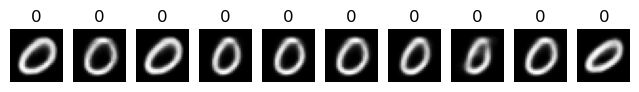

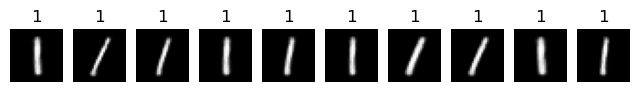

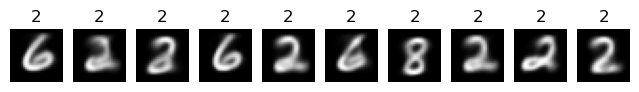

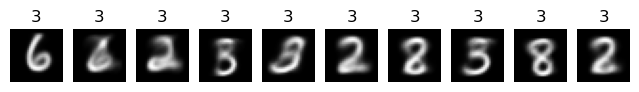

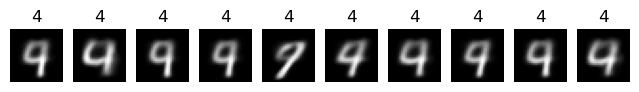

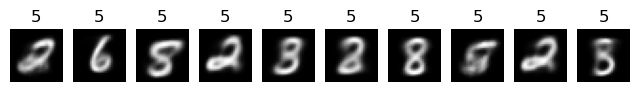

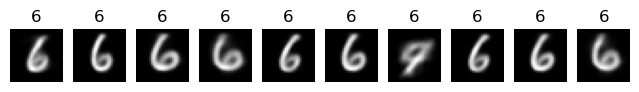

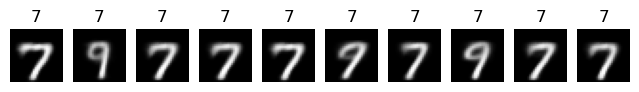

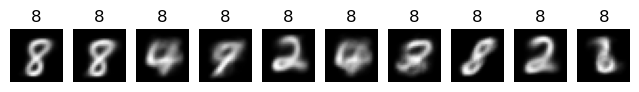

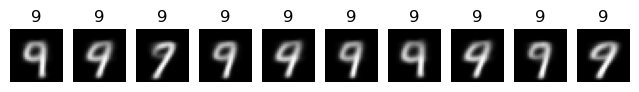

In [9]:
# your code here

def generate_digits(i):
        
    def forward(params, x_in):
        '''Forward pass of vector x_in through the network defined by params'''

        z1 = (x_in @ params['w1']) + params['b1']   # multiply weights, add bias
        a1 = ReLU(z1)   # nonlinear activation after the hidden layer
        z2 = (a1 @ params['w2']) + params['b2']   # multiply weights, add bias
        a2 = ReLU(z2)   # nonlinear activation after the hidden layer
        z3 = (a2 @ params['w3']) + params['b3']   # multiply weights, add bias
        a3 = ReLU(z3)   # nonlinear activation after the hidden layer
        z4 = (a3 @ params['w4']) + params['b4']   # multiply weights, add bias
        a4 = Sigmoid(z4)   # final sigmoid activation for output

        return a4

    # part 1, from lab/lec
    train_data = np.loadtxt('mnist_train.csv', delimiter=',', skiprows=1)
    test_data  = np.loadtxt('mnist_test.csv',  delimiter=',', skiprows=1)

    x_train = train_data[:,1:] #all rows, columns 1 and on
    y_train = train_data[:,0]  #all rows, column 0 only (labels)

    x_test  = test_data[:,1:]  #same but for test data
    y_test  = test_data[:,0]

    #Normalize data
    x_train = x_train / np.max(x_train)
    x_test  = x_test / np.max(x_test)

    Ntrain = len(x_train)

    # FILL IN THE ENCODER AND DECODER here:
    # For our purposes we will NOT have an activation at the end of the encoder.
    # ALSO change the final output to sigmoid, not softmax.

    def encode(params, x_in):
        z1 = (x_in @ params['w1']) + params['b1']   # multiply weights, add bias
        a1 = ReLU(z1)   # nonlinear activation after the hidden layer
        z2 = (a1 @ params['w2']) + params['b2']   # multiply weights, add bias
        return z2

    def decode(params, x_latent):
        z3 = (x_latent @ params['w3']) + params['b3']   # multiply weights, add bias
        a3 = ReLU(z3)   # nonlinear activation after the hidden layer
        z4 = (a3 @ params['w4']) + params['b4']   # multiply weights, add bias
        a4 = Sigmoid(z4)   # final sigmoid activation for output
        return a4

    def bce_loss(X_true, X_predict):
        smallnum = 1e-8
        loss = -np.mean(X_true * np.log(X_predict + smallnum) + (1 - X_true) * np.log(1 - X_predict + smallnum))
        return loss

    # Compute the loss for the autoencoder. Encode to the latent space, then decode.
    # Compare the output image to the input.

    def ae_compute_loss(params, x_in):
        x_latent = encode(params, x_in)
        x_out = decode(params, x_latent)
        return bce_loss(x_in, x_out)

    # Instead of initializing random weights and training here,
    # we LOAD the pre-trained MNIST autoencoder parameters from file.
    ae = np.load('MNIST-autoencoder.npz')
    my_params_ae = {
        'w1': ae['w1'],
        'b1': ae['b1'],
        'w2': ae['w2'],
        'b2': ae['b2'],
        'w3': ae['w3'],
        'b3': ae['b3'],
        'w4': ae['w4'],
        'b4': ae['b4'],
    }


    #generating 10 images of requested items

    num_images = 10

    #find all training images with label i
    idx_digit = np.where(y_train == i)[0]
    x_digit   = x_train[idx_digit]

    #encode them into the 2D latent space
    z_digit = encode(my_params_ae, x_digit)

    #compute mean and std of latent codes for this digit
    mu    = np.mean(z_digit, axis=0)
    sigma = np.std(z_digit, axis=0) + 1e-3  # avoid zero std

    # sample new latent points around this to introduce variation
    x_latent = rng.normal(loc=mu, scale=sigma*0.5, size=(num_images, z_digit.shape[1]))

    #decode the sampled latent points into images
    x_predict = decode(my_params_ae, x_latent)

    #plot generated images for this digit
    fig, axes = plt.subplots(1, num_images, figsize=(8, 3))

    for k in range(num_images):
        axes[k].imshow(x_predict[k].reshape(28, 28), cmap='gray')
        axes[k].set_title(str(i))
        axes[k].axis('off')
        
    plt.show()

    return


for i in range(10):
    generate_digits(i)

_______________________________________________________________________________________________________________________

## Problem 2: Random walk with increasing step size

In this problem, you will study 1-dimensional (1D) random walks with step size that is increasing as a function of time. In this case, each random step is sampled from a uniform distribution $[-S_0,S_0)$, where $S_0 = c t$ where $c$ is a constant and $t$ is time. . 

Consider $10^4$ random walkers performing random walks for $50$ timesteps, with $c = 0.5$. You can assume $t$ increeases linearly with steps (such that 50 timesteps corresponds to $t=50$). 

**Part I.** Calculate and plot

a) the mean displacement $\langle x \rangle$ as a function of time;

b) the mean square displacement $\langle x^2 \rangle$ as a function of time;

**Part II.** In this kind of random walk, is the relation $\langle x^2 \rangle \varpropto t$ still valid? To answer this question, fit the mean square displacement with a model function $a t^{\gamma} + b$ and discuss the value of the coefficient $\gamma$.

**Part III.** Repeat parts I and II but for $c = 1$. Compare the value of the coefficient $\gamma$ with the one obtained in Part II. Discuss your answer.  

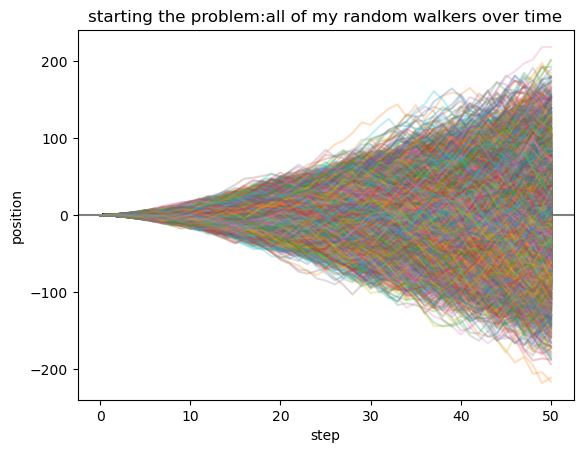

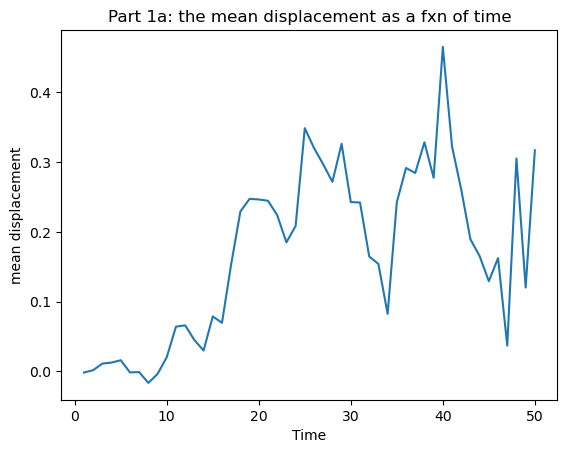

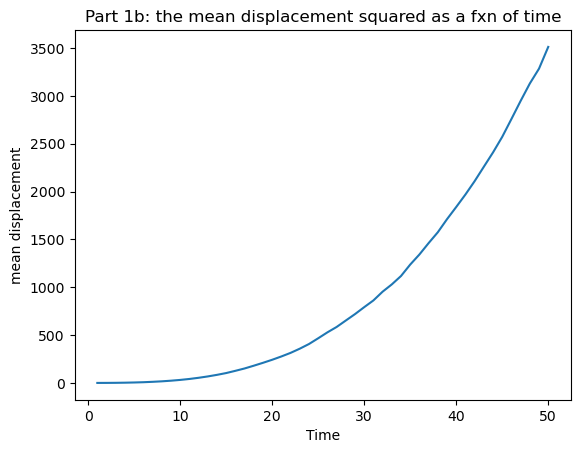

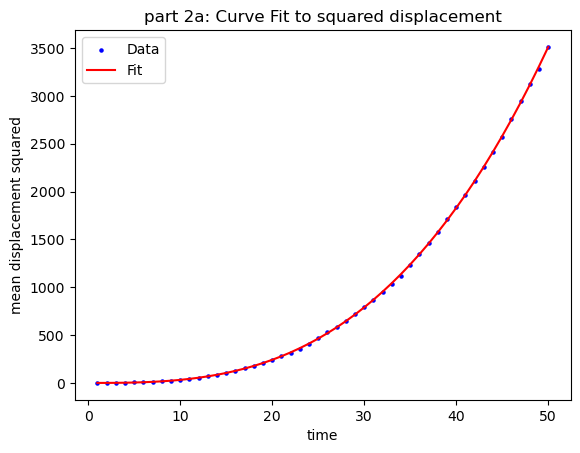

Part 2a: the parameters a,b, gamma are: [ 0.03817239 -0.06091021  2.9216551 ]

      
      The exact gamma we got on this run was 2.9216550984436784. (usually about 3 but different each time
      because of the random walking). This is above 1, which means x^2 is not linearly proportional with t.
       Instead, the value of gamma reflects the exponential relationship of x^2 with t.


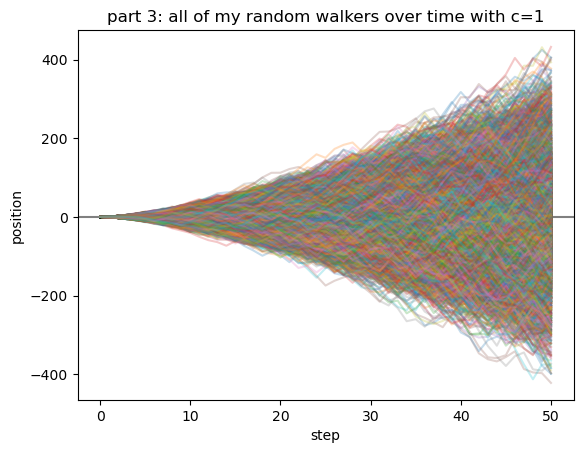

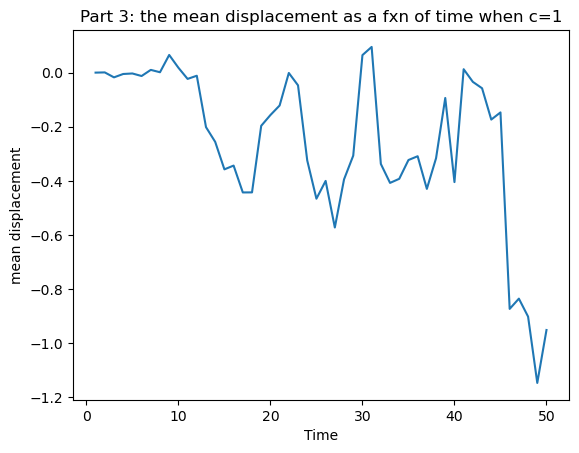

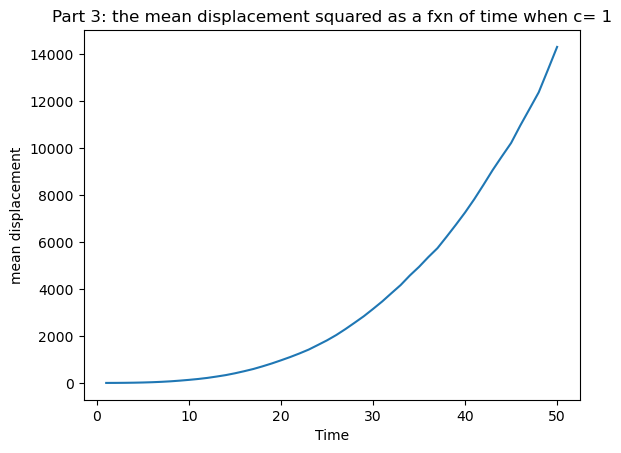

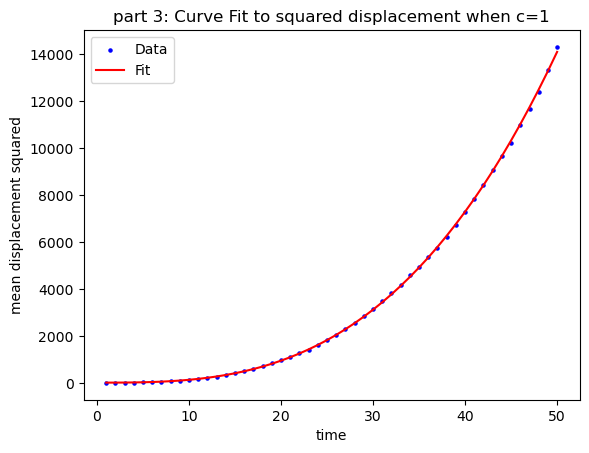

Part 3: the parameters a,b, gamma are: [ 0.13250243 12.59040048  2.9583046 ]

      
      The exact gamma we got on this run was 2.95830460073043. (usually about 3 but different each time
      because of the random walking). Compared with part 2, it is almost the same. This is 
       interesting because it suggests the rate that c changes with t doesn't actually matter 


In [3]:
# your code here

rng = np.random.default_rng()

#code about random walkers from lab
Timesteps = 50
Nwalkers = 10**4

x = np.zeros((Timesteps+1,Nwalkers))
c = .5 #time step constant


for i in range(1,Timesteps+1):
    s0 = c*i
    R = (-s0-s0)*rng.random(Nwalkers) + s0 #this is the range of numbers from -s0 to s0
    x[i] = x[i-1] + R  

plt.figure()
plt.plot(x,'-',alpha=0.25)
plt.axhline(0,color='grey',zorder=0)
plt.xlabel('step')
plt.ylabel('position')
plt.title("starting the problem:all of my random walkers over time")
plt.show()
plt.close()
#part 1
#part 1a

#mean displacement as fxn of time is the average of each row of x because each row is a timestep
mean_disp = [] #empty array of mean dispacements 

for i in range(1, Timesteps + 1):
    mean_disp.append(np.mean(x[i,:]))


xx = np.arange(1,Timesteps+1, 1)
plt.figure()
plt.plot(xx, mean_disp)
plt.title("Part 1a: the mean displacement as a fxn of time")
plt.xlabel("Time")
plt.ylabel("mean displacement")
plt.show()
plt.close()

#part 1b
#take mean squared:
mean_disp2 = []
for i in range(1, Timesteps + 1):
    mean_disp2.append(np.mean((x[i,:])**2))

plt.figure()
plt.plot(xx, mean_disp2)
plt.title("Part 1b: the mean displacement squared as a fxn of time")
plt.xlabel("Time")
plt.ylabel("mean displacement")
plt.show()
plt.close()

#part 2

#functions for curve fitting
def chi_square(y_obs, y_model):
    out = np.sum((y_obs - y_model)**2)
    return out

def poly(x,a,b,gamma):
    return a*x**gamma + b

# fitting

initial_guesses = [1.,0.,4]

# Curve fitting
params_opt, params_cov = curve_fit(poly, xx, mean_disp2, p0=initial_guesses)

# Plotting the data and the fit
plt.scatter(xx, mean_disp2, s=5, color='blue', label='Data')
plt.plot(xx, poly(xx, *params_opt), color='red', label='Fit')



# Displaying the plot
plt.legend()
plt.xlabel("time")
plt.ylabel("mean displacement squared")
plt.title("part 2a: Curve Fit to squared displacement")
plt.show()

print("Part 2a: the parameters a,b, gamma are:",params_opt)
print(f"""
      
      The exact gamma we got on this run was {params_opt[2]}. (usually about 3 but different each time
      because of the random walking). This is above 1, which means x^2 is not linearly proportional with t.
       Instead, the value of gamma reflects the exponential relationship of x^2 with t.""" )

#Part 3


#code about random walkers from lab
Timesteps = 50
Nwalkers = 10**4

x = np.zeros((Timesteps+1,Nwalkers))
c = 1 #time step constant


for i in range(1,Timesteps+1):
    s0 = c*i
    R = (-s0-s0)*rng.random(Nwalkers) + s0 #this is the range of numbers from -s0 to s0
    x[i] = x[i-1] + R  

plt.figure()
plt.plot(x,'-',alpha=0.25)
plt.axhline(0,color='grey',zorder=0)
plt.xlabel('step')
plt.ylabel('position')
plt.title("part 3: all of my random walkers over time with c=1")
plt.show()
plt.close()
#part 1
#part 1a

#mean displacement as fxn of time is the average of each row of x because each row is a timestep
mean_disp = [] #empty array of mean dispacements 

for i in range(1, Timesteps + 1):
    mean_disp.append(np.mean(x[i,:]))


xx = np.arange(1,Timesteps+1, 1)
plt.figure()
plt.plot(xx, mean_disp)
plt.title("Part 3: the mean displacement as a fxn of time when c=1")
plt.xlabel("Time")
plt.ylabel("mean displacement")
plt.show()
plt.close()

#part 1b
#take mean of squared:
mean_disp2 = []
for i in range(1, Timesteps + 1):
    mean_disp2.append(np.mean((x[i,:])**2))

plt.figure()
plt.plot(xx, mean_disp2)
plt.title("Part 3: the mean displacement squared as a fxn of time when c= 1")
plt.xlabel("Time")
plt.ylabel("mean displacement")
plt.show()
plt.close()

#part 2

#functions for curve fitting
def chi_square(y_obs, y_model):
    out = np.sum((y_obs - y_model)**2)
    return out

def poly(x,a,b,gamma):
    return a*x**gamma + b

# fitting

initial_guesses = [1.,0.,4]

# Curve fitting
params_opt, params_cov = curve_fit(poly, xx, mean_disp2, p0=initial_guesses)

# Plotting the data and the fit
plt.scatter(xx, mean_disp2, s=5, color='blue', label='Data')
plt.plot(xx, poly(xx, *params_opt), color='red', label='Fit')



# Displaying the plot
plt.legend()
plt.xlabel("time")
plt.ylabel("mean displacement squared")
plt.title("part 3: Curve Fit to squared displacement when c=1")
plt.show()

print("Part 3: the parameters a,b, gamma are:",params_opt)
print(f"""
      
      The exact gamma we got on this run was {params_opt[2]}. (usually about 3 but different each time
      because of the random walking). Compared with part 2, it is almost the same. This is 
       interesting because it suggests the rate that c changes with t doesn't actually matter """ )





_______________________________________________________________________________________________________________________

## Problem 3: Extract the diffusion constant of a random walk in Wall Street

The irregular movement of stock prices show a similarity with the diffusive behavior of particles in a liquid, and random walks have found a considerable application in modern finance theory. In this problem, you will extract the diffusion constant of the stock prices (returns) of the Apple stock. The file `AAPL_2020_returns.csv` contains the stock price daily returns of Apple for the entire year 2020, a total of 252 values, each of which is the daily percentage change, that is the daily "displacement" (at t=1) from the previous day (t=0). Thus, those 252 daily returns of the stock can be considered equivalent to 252 random walkers doing one random step each.   

Load the data from the `AAPL_2020_returns.csv` file and extract the diffusion constant (D) of this "random walk in Wall St", applying the methods discussed in Lec/Lab

a) 
The diffusion coefficient is related to the mean square displacement via
$$
D = \frac{<x^2>}{2 T}
$$
where $T$ is the time interval (in our case one day). {what are its units?}

b) The diffusion coefficient is related to the standard deviation of a gaussian distribution by: 
$$
\sigma = sqrt(<x^2>) = \sqrt{2DT}
$$
Use this information to compare the data distribution and the appropriately unit-normalized gaussian as a check of your derivation of $D$.  

The diffusion coefficient is {diff_const}. The units are return squared per day.


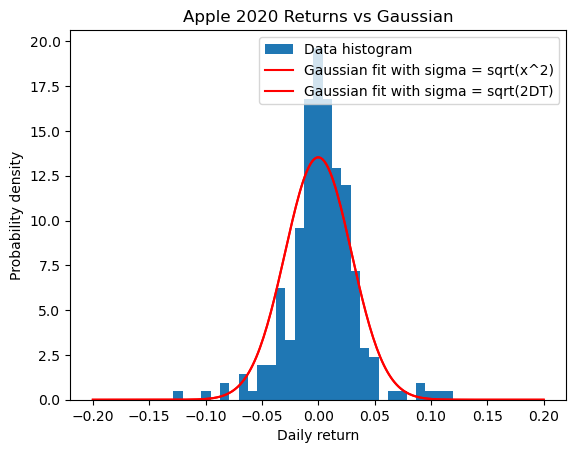

The unit-normalized Gaussian with sigma = sqrt(x²) has the same spread as the data, 
      confirming our D value, but the real return distribution is more peaked and has 
      heavier tails than a Gaussian.


In [4]:
data = np.loadtxt('AAPL_2020_returns.csv')

#part a finding D
#to find the mean displacement, if we are treating this as 252 random walkers taking one step, we can just
#average all 252 of the steps to get d

avg = np.mean(data)
avg_2 = np.mean(data**2)

diff_const = avg_2 / 2

print("The diffusion coefficient is {diff_const}. The units are return squared per day.")

#part b 
xx = np.linspace(-.2,.2, 252)

#normalized gaussian
def gaussian(x, mean, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(x-mean)**2/(2*sigma**2))

yy = gaussian(xx, 0, np.sqrt(avg_2))
yyy = gaussian(xx, 0, np.sqrt(2*diff_const))

plt.figure()
plt.hist(data, bins=30, density=True,label="Data histogram")
plt.plot(xx, yy, 'r-', label="Gaussian fit with sigma = sqrt(x^2)")
plt.plot(xx, yyy, 'r-', label="Gaussian fit with sigma = sqrt(2DT)")
plt.legend()
plt.xlabel("Daily return")
plt.ylabel("Probability density")
plt.title("Apple 2020 Returns vs Gaussian")
plt.show()
plt.show
plt.close()

print("""The unit-normalized Gaussian with sigma = sqrt(x²) has the same spread as the data, 
      confirming our D value, but the real return distribution is more peaked and has 
      heavier tails than a Gaussian.""")

---

## Problem 4: The GELU activation function

In 2016 researchers proposed an activation function for neural networks they called "GELU" for Gaussian Error Linear Unit. This function has been extremely successful in applications and is widely used in machine learning and AI, including in the original ChatGPT. You can read the GELU paper here: [https://arxiv.org/abs/1606.08415](https://arxiv.org/abs/1606.08415). This paper has been cited over 9,000 times since it was first published in 2016!

The GELU function is defined as:

$$ \textrm{GELU}(x) = x \cdot \Phi(x) $$

where $\Phi(x)$ is the integral (antiderivative) of the standard Gaussian function $G$ with $\mu=0$, $\sigma=1$:

$$ \Phi(x) = \int_{-\infty}^x G(z)\, dz $$

In statistics, this function $\Phi(x)$ is known as the *cumulative distribution function* (CDF) of the standard normal Gaussian.

a) Make a plot of the standard normal Gaussian $G(x)$ and its integral (or antiderivative) $\Phi(x)$ over the range $[-5, 5]$. (Compute the antiderivative numerically using methods from this course.)  
  

b) Plot the GELU function, the RELU function, and the "swish" function $T(x)$, all over the same range. How are these activation functions similar (or different)?  
  

c) In the original GELU paper, the authors proposed an approximation of the GELU function with the following form:
$$ \textrm{GELU}(x) \approx 0.5 x (1+\textrm{tanh}(A(x + Bx^3)) $$
with parameters $ A = \sqrt{2/\pi} $ and $ B = 0.044715 $.
Using the same functional form with parameters $A$ and $B$, perform a non-linear curve fit to find the best values of these parameters for your calculated values of GELU.  
  

d) Compare the RMS errors (the root-mean-square errors) for the approximation given in the paper versus the approximation you found using methods from this course.

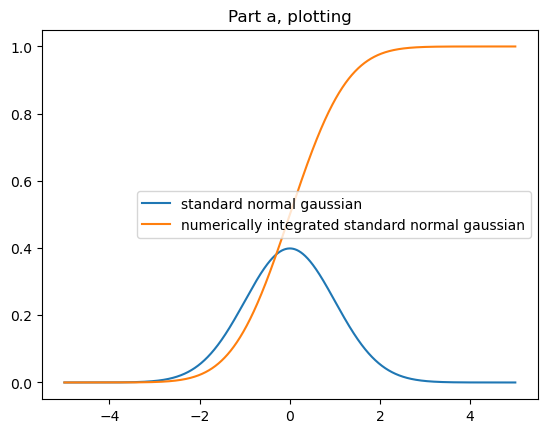

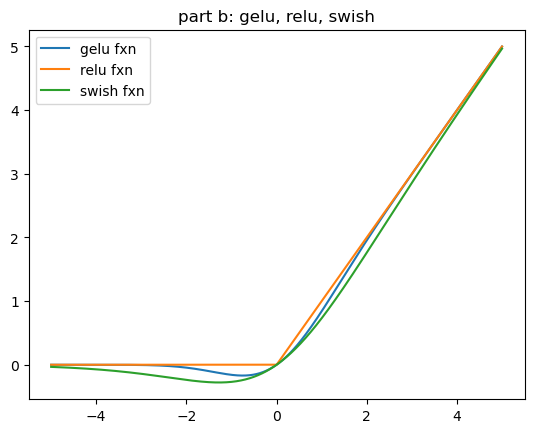


      Part b:
      
      The ReLU function is the simplest because it is just zero for all negative 
      inputs and then grows linearly for positive ones, so it has a sharp corner at 0.
The swish function is smoother because it multiplies the input by a sigmoid, so negative 
      values aren't cut off completely.
The GELU function is also smooth and looks similar to swish, but it curves a 
      little differently and transitions even more gradually from negative to positive values.

      Part C:
      The best fit values I got were a = 0.7997317272731354 and b = 0.04363931677542078

for reference, the parameters from the paper are a = 0.7978845608028654 and b = 0.044715

Part d:
the RMS error using the parameters from the paper is 0.00025062508832562566. The RMS error 
using the parameters I got from curve fitting is 0.0002000848982249491. Interestingly, the RMS is slightly lower
with my fitted parameters. I did not expect this, perhaps it is due to rounding etc. 



In [5]:
# your code here
def gaussian(x, mean, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(x-mean)**2/(2*sigma**2))

#part a 

#integration

N=5000
t=np.linspace(-5,5,N)

dt = t[1]-t[0]

#making array of zeros
T = np.zeros_like(t)


#initial condition 
T[0]=0


f_array = gaussian(t, 0, 1)
# the next loop solves the rate equations to find x(t), v(t) and a(t)

    #treating this like a rate equaiton problem, using dT/dt = gaussian(t)
for i in range(1, N):
    T[i] = T[i-1] + dt * f_array[i-1]


#plotting

plt.figure()
plt.title("Part a, plotting")
plt.plot(t, f_array, label = "standard normal gaussian")
plt.plot(t, T, label = "numerically integrated standard normal gaussian")
plt.legend()
plt.show()
plt.close()

#part b 

#necessary fxns
def ReLU(x):
    '''ReLU: equal to x where x > 0, otherwise equal to 0.0'''
    return np.maximum(x, 0.0)

def Sigmoid(x):
    '''Sigmoid function: 1/(1+exp(-x))'''
    return 1.0/(1+np.exp(-x))

def Swish(x):
    '''Swish function T(x) (see reading, equation 11.14)'''
    return x*Sigmoid(x)

#making the gelu function
gelu = t*T

plt.figure()
plt.plot(t, gelu, label ="gelu fxn")
plt.plot(t, ReLU(t), label ="relu fxn")
plt.plot(t, Swish(t), label ="swish fxn")
plt.title("part b: gelu, relu, swish")
plt.legend()
plt.show()
plt.close()
    
print("""
      Part b:
      
      The ReLU function is the simplest because it is just zero for all negative 
      inputs and then grows linearly for positive ones, so it has a sharp corner at 0.
The swish function is smoother because it multiplies the input by a sigmoid, so negative 
      values aren't cut off completely.
The GELU function is also smooth and looks similar to swish, but it curves a 
      little differently and transitions even more gradually from negative to positive values.""")

#part c

#making a funciton which uses the paper authors' approimation of gelu
def gelu_approx(x,a,b):
    return .5*x*(1+np.tanh(a*(x+b*x**3)))

# fitting

initial_guesses = np.ones(2)

# Curve fitting
params_opt, params_cov = curve_fit(gelu_approx, t, gelu, p0=initial_guesses)

print(f"""
      Part C:
      The best fit values I got were a = {params_opt[0]} and b = {params_opt[1]}

for reference, the parameters from the paper are a = {np.sqrt(2/np.pi)} and b = {.044715}""")



# part d, comparing RMS errors

#i am using my numerically computed gelu as the "baseline" reference

# parameters from the paper
a_paper = np.sqrt(2/np.pi)
b_paper = 0.044715

#the two ifferent approximations
gelu_paper = gelu_approx(t, a_paper, b_paper)
gelu_me   = gelu_approx(t, params_opt[0], params_opt[1])

#rms error function i made
def rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

rms_paper = rms_error(gelu, gelu_paper)
rms_fit   = rms_error(gelu, gelu_me)

print(f"""
Part d:
the RMS error using the parameters from the paper is {rms_paper}. The RMS error 
using the parameters I got from curve fitting is {rms_fit}. Interestingly, the RMS is slightly lower
with my fitted parameters. I did not expect this, perhaps it is due to rounding etc. 
""")






---

## Problem 5: Explore an Electrocardiogram

The electrocardiogram (EKG) represents cardiac activity from one point in time to the next. It can be viewed as a *time-voltage* 1D signal of the heartbeat. The EKG provides critical information for clinical diagnosis of heart conditions. When looking at an EKG, doctors make certain measurements such as, heights of peaks, and areas under a curve.

You are given the EKG values of a 45 year old male in the file `cardio.csv`. This is an array containing the $y$ axis points (voltages in $mV$) of the signal. The $x$ points is the time in ($ms$) starting at $0$ and moving by $1ms$ for every data point.

The $𝑃𝑅$ segment is supposed to be on the $y=0$ horizontal line which is called the "baseline".
<BR><BR>
<img src='cardio.png' alt="Drawing" style="width: 400px;"/>
<BR><BR>
You are also given the two time points for the $QRS$ interval (marked by $QRS$ in the image above):

- `QRSWAVE_low`, the onset (starting time in $ms$ from the start of the signal) of the QRS wave, and 
- `QRSWAVE_high`, the ending time  of the QRS wave.

In [6]:
QRSWAVE_low = 460 
QRSWAVE_high = 600

**1.** Load the file with the signal into a local variable. Plot the signal. 

**2.** We want the bulk of it to be along the $y=0$ horizontal axis, but as you will observe, our signal appears shifted. Move the signal along the $y$ axis so the $PR$ segment, the "baseline", is on $y=0$. This is also the position along which most of the signal is on the $y=0$ line.

**3.** The signal is too noisy as you can see. Use the `gaussian_filter1d` function (which has been imported by calling the statement 
```
from scipy import ndimage
from scipy.ndimage import gaussian_filter1d 
```
in the initial cell of this Notebook) to fit a set of gaussians on the signal and save the new smoothed signal, which you will use to answer the following questions.

**4.** Measure the height in $mV$ of the highest peak (the R peak). 

**5.** Measure the time interval from the onset of $QRS$ to the peak of $R$.

**6.** Calculate the 1/2 area under the $R$ curve (marked with purple in Fig.1). The start of the R interval is where the signal passes through the baseline before it starts its ascend to the $R$ peak.

<BR><BR>
<img src='QRS_area.png' alt="QRS" style="width: 400px;"/>
**Fig. 1**

**Note:** all voltage measurements are in respect to the "baseline" and all time measurements are from the start of the signal.

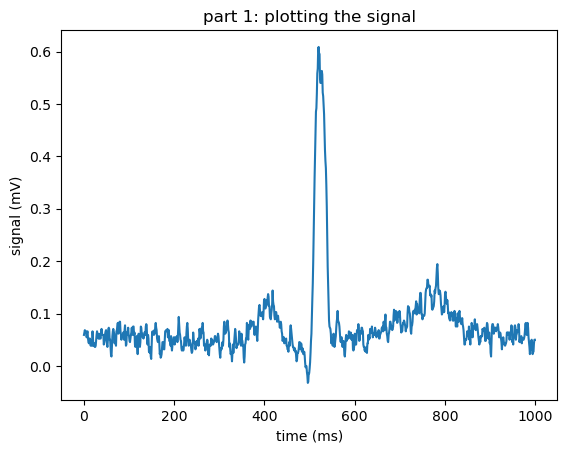

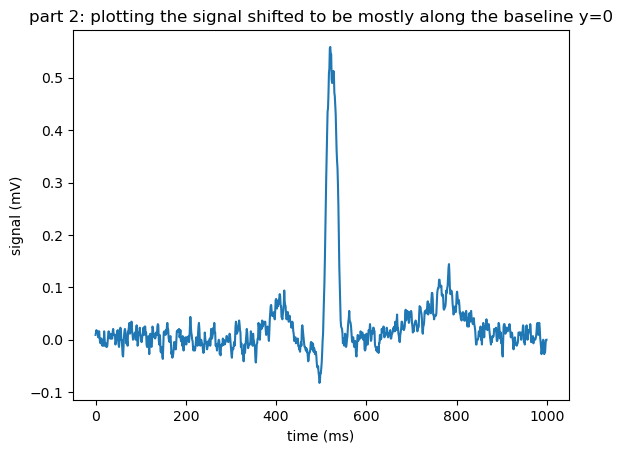

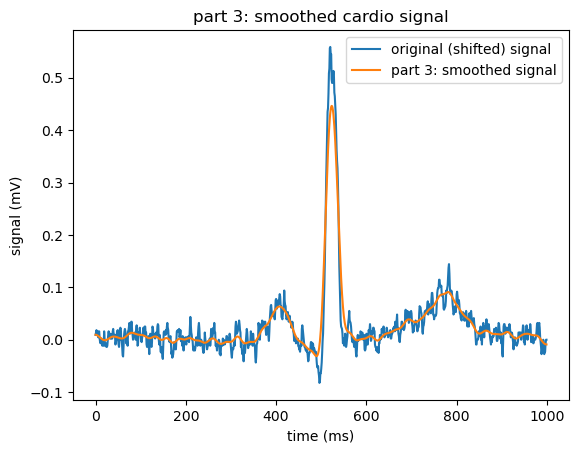


      part 4:
      the max value is 0.44622578454014605 mV

      Part 5:
      The time interval between rmax and the start of qrs wave is 60 mS

      part 6:
      The 1/2 area from cross through baseline, to the peak is 4.8589506249999985


In [7]:
# your code here
#part 1
data = np.loadtxt('cardio.csv',skiprows=1)
xx = np.arange(len(data))

plt.figure
plt.plot(xx, data)
plt.title("part 1: plotting the signal")
plt.xlabel("time (ms)")
plt.ylabel("signal (mV)")
plt.show()
plt.close()

#part 2, shifting
data = data-.05
xx = np.arange(len(data))

plt.figure
plt.plot(xx, data)
plt.title("part 2: plotting the signal shifted to be mostly along the baseline y=0")
plt.xlabel("time (ms)")
plt.ylabel("signal (mV)")
plt.show()
plt.close()

# part 3, smoothing 
sigma = 8.0  
smoothed_data = gaussian_filter1d(data, sigma=sigma)


plt.figure()
plt.plot(xx, data, label="original (shifted) signal")
plt.plot(xx, smoothed_data, label="part 3: smoothed signal")
plt.title("part 3: smoothed cardio signal")
plt.xlabel("time (ms)")
plt.ylabel("signal (mV)")
plt.legend()
plt.show()
plt.close()

#part 4
max = np.max(smoothed_data)
print(f"""
      part 4:
      the max value is {max} mV""" )

#part 5

#finding where rhe max occurs and then finding difference between that and the start of the interval

time_interval = np.argmax(data) - QRSWAVE_low
print(f"""
      Part 5:
      The time interval between rmax and the start of qrs wave is {time_interval} mS""")

#part 6

#to find the index of where r starts, I am going to work backwards from the index of the r peak and 
#test where it crosses 0

#initialize some random index number
index_of_r0 = 0 

#test the index values below the max
for i in range(1000):
    index = np.argmax(data)-i

    if data[index] <= 0:
        index_of_r0 = index 
        break 

def trapz(f_array, xmin, xmax):
    N = len(f_array)
    dx = (xmax-xmin)/(N-1)
    mid_sum = np.sum(f_array[1:-1])
    return 0.5*(f_array[0] + 2*mid_sum + f_array[-1])*dx


f_array_for_area = data[index_of_r0: np.argmax(data)]
area = trapz(f_array_for_area, index_of_r0, np.argmax(data))

print(f"""
      part 6:
      The 1/2 area from cross through baseline, to the peak is {area}""")






____________________________________________________________________________________________________________________________

---

____________________________________________________________________________________________________________________________

## Please, submit your HW as ***.ipynb*** file, on Gradescope.